<a href="https://colab.research.google.com/github/gamagilang/FeatureReductionPCA/blob/master/DataExploratoryPGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone http://github.com/gamagilang/gamaundergraduatethesis.git

Cloning into 'gamaundergraduatethesis'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# load dataset
df = pd.read_csv('gamaundergraduatethesis/DataPGE1.csv')
print(df.head())


        TI203     PI215     PI216  ...        FT402    T_wbulb  SSC_gros
0  180.359772  8.914062  8.877930  ...  7431.736816  16.352715  8.097871
1  180.481644  8.881836  8.850586  ...  7362.840820  16.244543  8.068487
2  180.359772  8.923828  8.884766  ...  6879.880859  16.138443  8.034688
3  180.329300  8.931641  8.893555  ...  7206.157715  16.232552  8.036983
4  180.329300  8.920898  8.887695  ...  7182.403320  16.131260  8.032251

[5 rows x 11 columns]


In [ ]:
#cheking overall dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TI203     2840 non-null   float64
 1   PI215     2840 non-null   float64
 2   PI216     2840 non-null   float64
 3   PI218     2840 non-null   float64
 4   MP-1101   2840 non-null   float64
 5   PI255A    2840 non-null   float64
 6   TI405     2840 non-null   float64
 7   TI401     2840 non-null   float64
 8   FT402     2840 non-null   float64
 9   T_wbulb   2840 non-null   float64
 10  SSC_gros  2840 non-null   float64
dtypes: float64(11)
memory usage: 244.2 KB
None


**Selecting Sampel**

In [ ]:
indices = [ 99, 299, 439]
# create dataframe 
samples = pd.DataFrame(df.loc[indices], columns = df.keys())
print('chosen Sample of Operational Data PGE:')
print(samples)

chosen Sample of Operational Data PGE:
          TI203     PI215     PI216  ...        FT402    T_wbulb  SSC_gros
99   180.268356  8.907227  8.870117  ...  7204.887207  16.225302  8.069969
299  180.390228  9.689453  9.726562  ...  7125.667969  17.015287  7.460044
439  180.405472  8.862305  8.831055  ...  6966.279785  16.236526  8.071239

[3 rows x 11 columns]


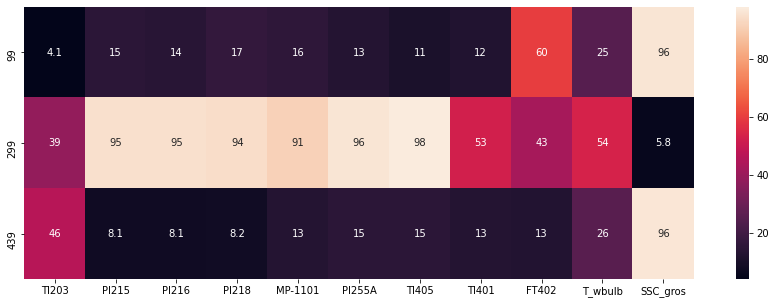

In [ ]:
# plotting Percentile heatmap for selected sample
percentile_data = 100*df.rank(pct=True)
percentile_samples = percentile_data.loc[indices]
plt.figure(figsize=(15,5))
sns.heatmap(percentile_samples, annot = True)

**Feature Relevance**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

new_df = df.drop('SSC_gros',axis = 1)

# Train & Split Data
Xtrain,Xtest,Ytrain,Ytest = train_test_split(new_df,df['SSC_gros'], test_size=.25,random_state=42)

# create decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(Xtrain,Ytrain)

# evaluate prediction
score = regressor.score(Xtest,Ytest)
print(score)

0.9420407004213779


Note: The coeficient of determination R-squared shown that the model can fit the data

**Feature Distribution**

In order to see the relevance between all feature againts each other and also all feature with the predicted ones, plotting scatter matrix will help you understand the correlation between all feature within the dataset. Previous prediction model using regression tree in accordance to predict MP-1101 show positive and near one R-squared score indicating all features fit almost perfectly to the MP-1101 data. So here your preliminiary hypothesis should be 'The MP-1101 data have a positive correlation to all of the feature within the datasets'


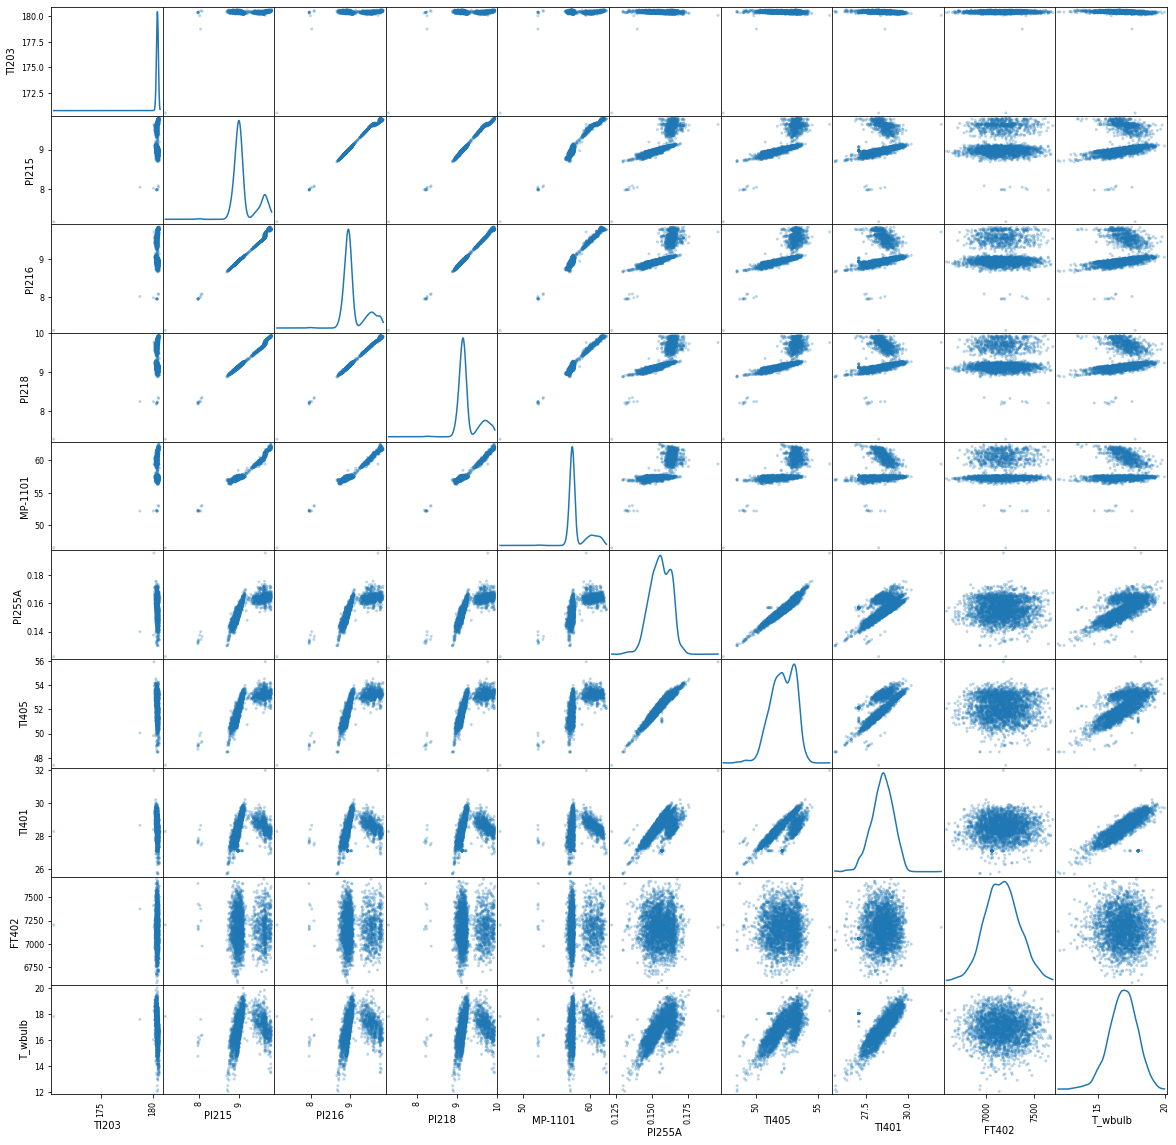

In [ ]:
# Build scatter matrix for each features
pd.plotting.scatter_matrix(new_df,alpha = 0.3,figsize=(20,20),diagonal = 'kde')
plt.show()

**Note** : From matrix above, we all clearly see that using the prediction 

In [ ]:
df.corr()

,TI203,PI215,PI216,PI218,MP-1101,PI255A,TI405,TI401,FT402,T_wbulb,SSC_gros
TI203,1.000000,0.096464,0.103569,0.116897,0.147631,-0.025939,-0.022179,-0.129883,0.007230,-0.178230,-0.252186
PI215,0.096464,1.000000,0.996730,0.996694,0.979665,0.790534,0.762814,0.244928,0.011361,0.230865,-0.958225
PI216,0.103569,0.996730,1.000000,0.998489,0.985344,0.776501,0.748171,0.222993,0.013126,0.207769,-0.960989
PI218,0.116897,0.996694,0.998489,1.000000,0.984777,0.775659,0.749228,0.223439,0.012035,0.208728,-0.961634
MP-1101,0.147631,0.979665,0.985344,0.984777,1.000000,0.666713,0.637605,0.082945,0.015478,0.070959,-0.969095
PI255A,-0.025939,0.790534,0.776501,0.775659,0.666713,1.000000,0.969664,0.705527,-0.006611,0.688760,-0.688916
TI405,-0.022179,0.762814,0.748171,0.749228,0.637605,0.969664,1.000000,0.774177,0.001598,0.721635,-0.673726
TI401,-0.129883,0.244928,0.222993,0.223439,0.082945,0.705527,0.774177,1.000000,0.047311,0.813760,-0.171488
FT402,0.007230,0.011361,0.013126,0.012035,0.015478,-0.006611,0.001598,0.047311,1.000000,-0.035284,-0.029891
T_wbulb,-0.178230,0.230865,0.207769,0.208728,0.070959,0.688760,0.721635,0.813760,-0.035284,1.000000,-0.083460


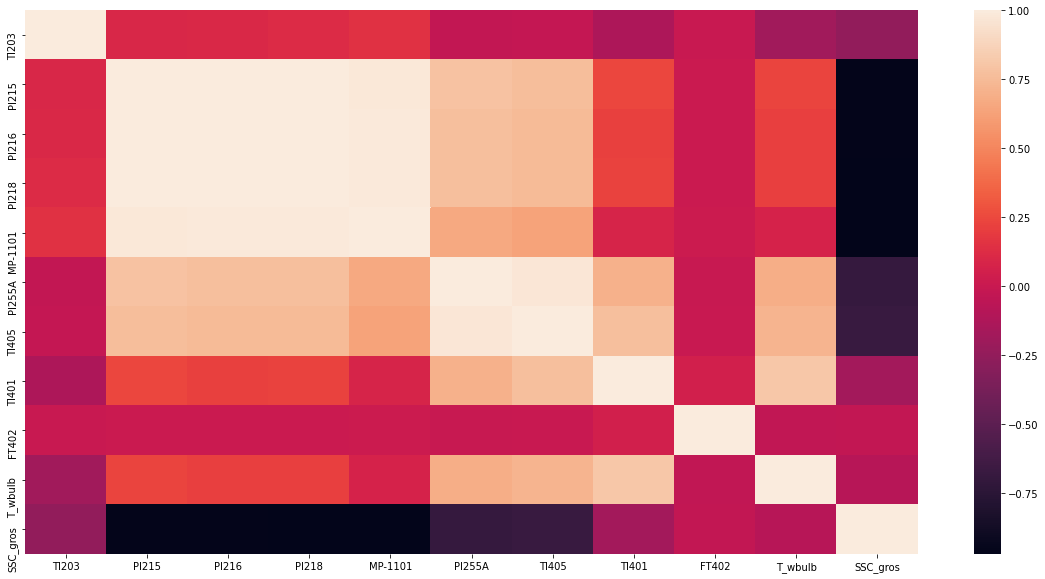

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr())

Note : In Feature Distribution part, the preliminary conclusions are:
1) The scatter matrix shows several outliers for every feature-feature plot
2) there are strong correlation between several feature-feature pairs exclude SSC_gros
3) All feature show normal distribution
4) 

**Data Preprocessing** 

In this section your objective are removing the multiple outlier within every feature and reducing corelated feature using pcincipal component analysis

**Outlier Detection**

Removing outlier is crucial in data preprocessing in order to clearly understand the data. There are many explaination for what constitute the outlier in dataset. But the most used method is Tukey's method where outlier are determined by using the interquartile range as the lower and upper limit of data allowed for the dimant

In [ ]:
from collections import Counter, defaultdict
outliers_all=[]
outliers_index = []
dict_outliers = {}

In [ ]:
for feature in df.keys():
  # Calculate 25th Percentile (Q1)
  Q1 = df[feature].quantile(.25)
  # Calculate 75th Percentile (Q3)
  Q3 = df[feature].quantile(.75)
  step = 1.5*(Q3-Q1)
  # Display the outlier
  print("Data considered as outliers for the feature '{}':".format(feature))
  outlier_df = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step ))]
  print(outlier_df)
  # Gather index of all outliers
  feature_outlier = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step ))]
  outliers_all.extend(list(feature_outlier.index.values))


Data considered as outliers for the feature 'TI203':
           TI203     PI215     PI216  ...        FT402    T_wbulb   SSC_gros
87    180.176956  9.614258  9.534180  ...  7194.714355  17.526304   7.633740
233   180.192184  9.615234  9.603516  ...  7462.880371  15.669367   7.505577
302   180.161713  9.552734  9.461914  ...  6972.410156  18.284287   7.663784
416   180.649216  9.803711  9.782227  ...  7095.195313  16.654249   7.368328
543   180.192184  9.593750  9.500977  ...  6997.750000  17.574217   7.630589
687   180.176956  9.035156  8.987305  ...  7059.837891  18.205147   7.971530
837   180.664459  9.747070  9.802734  ...  7048.589844  16.579536   7.361885
876   180.192184  9.620117  9.563477  ...  7367.812988  18.058414   7.558629
1024  180.176956  9.104492  9.055664  ...  6947.416992  18.549145   7.919898
1653  180.192184  9.086914  9.040039  ...  7110.233398  17.049644   7.943582
1657  180.192184  9.078125  9.031250  ...  7200.226563  17.527239   7.876767
1679  180.176956  9.078

In [ ]:
# multiple feature outliers
outliers_mult = []
outliers_mult = [item for item, count in Counter(outliers_all).items() if count > 1]
print(outliers_mult)
a = len(outliers_mult)
print(a)

[87, 233, 302, 416, 543, 837, 876, 1722, 1724, 1725, 1726, 1749, 2256, 2257, 2258, 7, 8, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 291, 292, 296, 297, 298, 299, 300, 301, 303, 304, 305, 307, 308, 309

In [ ]:
outliers = outliers_mult
df_good = df.drop(df.index[outliers])
#df_good = df.drop(df.index[outliers]).reset_index(drop = True)

In [ ]:
print(df_good.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2839
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TI203     2152 non-null   float64
 1   PI215     2152 non-null   float64
 2   PI216     2152 non-null   float64
 3   PI218     2152 non-null   float64
 4   MP-1101   2152 non-null   float64
 5   PI255A    2152 non-null   float64
 6   TI405     2152 non-null   float64
 7   TI401     2152 non-null   float64
 8   FT402     2152 non-null   float64
 9   T_wbulb   2152 non-null   float64
 10  SSC_gros  2152 non-null   float64
dtypes: float64(11)
memory usage: 201.8 KB
None


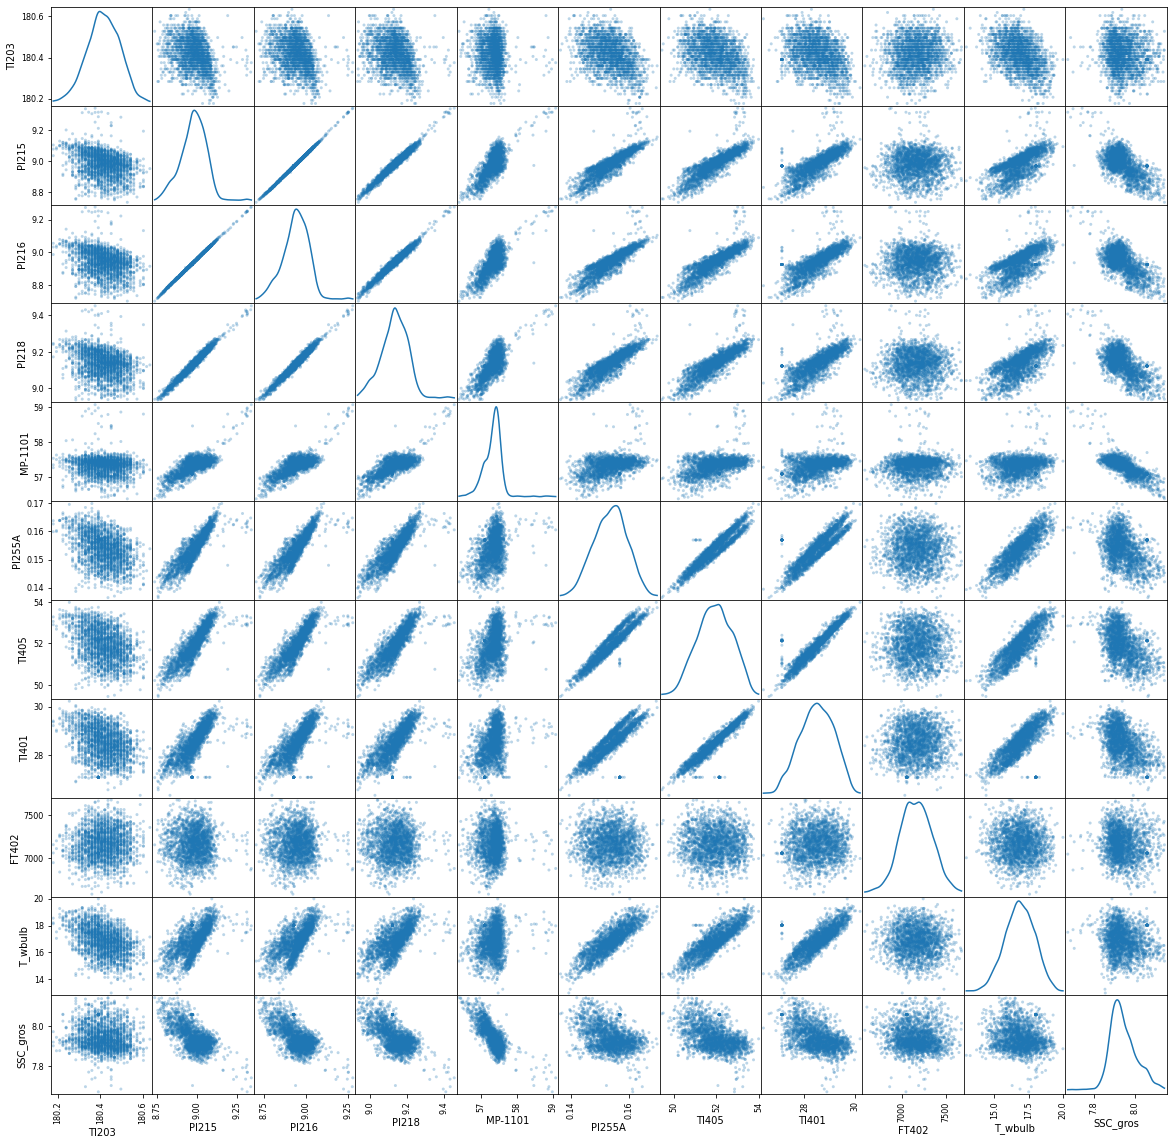

In [ ]:
# Build scatter matrix for each features
pd.plotting.scatter_matrix(df_good,alpha = 0.3,figsize=(20,20),diagonal = 'kde')
plt.show()

In [ ]:
df_good.to_csv(r'cleandataPGE3.csv')

In [ ]:
print(df_good.corr())

             TI203     PI215     PI216  ...     FT402   T_wbulb  SSC_gros
TI203     1.000000 -0.309571 -0.300429  ...  0.058657 -0.414518 -0.097189
PI215    -0.309571  1.000000  0.999375  ...  0.001266  0.659932 -0.647037
PI216    -0.300429  0.999375  1.000000  ...  0.002726  0.657415 -0.655088
PI218    -0.289324  0.985884  0.985714  ... -0.001553  0.652701 -0.642818
MP-1101  -0.067912  0.775507  0.775255  ...  0.035707  0.187250 -0.774271
PI255A   -0.388337  0.877146  0.877554  ... -0.027097  0.850641 -0.399969
TI405    -0.368651  0.865726  0.866670  ... -0.008938  0.857052 -0.470450
TI401    -0.326532  0.773011  0.776089  ...  0.057736  0.788652 -0.491636
FT402     0.058657  0.001266  0.002726  ...  1.000000 -0.045691 -0.100413
T_wbulb  -0.414518  0.659932  0.657415  ... -0.045691  1.000000 -0.135476
SSC_gros -0.097189 -0.647037 -0.655088  ... -0.100413 -0.135476  1.000000

[11 rows x 11 columns]


In [ ]:
## checking outlier 
import seaborn as sns
import pandas.util.testing as tm

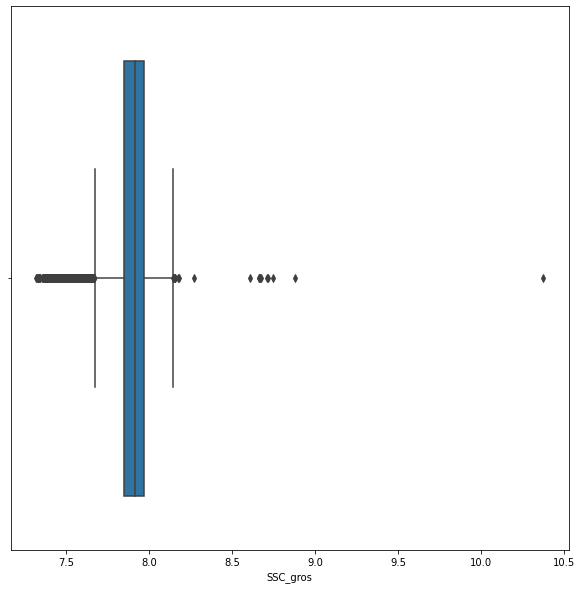

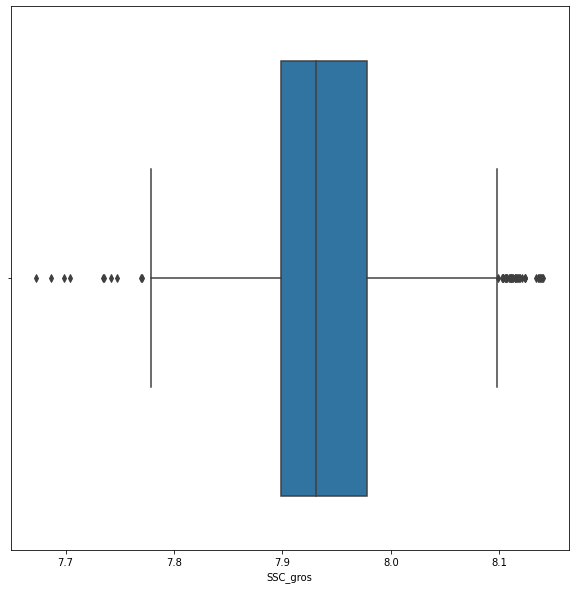

In [ ]:
#for col in df.columns:
#  plt.figure(figsize=(10,10))
#  sns.boxplot(df[col])
plt.figure(1,figsize=(10,10))
sns.boxplot(df['SSC_gros'])
plt.figure(2,figsize=(10,10))
sns.boxplot(df_good['SSC_gros'])

**Principle Component Analysis**

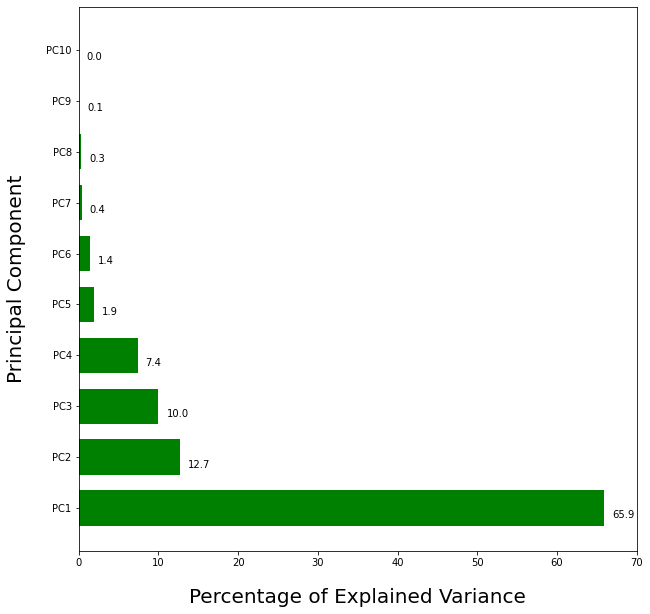

In [ ]:
class Data:
  def __init__(self,Inputs,Outputs):
    self.Inputs = Inputs
    self.Outputs = Outputs
    #self.Labels = Labels
Data = Data(df_good.loc[:,'TI203':'T_wbulb'],df_good.loc[:,'SSC_gros'])

# Standarized the Data Input 
scaler = StandardScaler()
scaler.fit(Data.Inputs)
scaled_data = scaler.transform(Data.Inputs)
# Perform PCA
#n = len(df_new.columns)
pca = PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
explained_variance = pca.explained_variance_ratio_
per_var = np.round(explained_variance*100, decimals=1)
label = ['PC' + str(x) for x in range(1, len(per_var)+1)]
df_pca = pd.DataFrame(x_pca,columns=label)

# Ploting PCA 
plt.figure(figsize=(10,10))
plt.barh(range(len(per_var)),per_var,0.7, tick_label = label, align = 'center', color = 'green')
plt.ylabel('Principal Component',fontsize = 20, labelpad=20)
plt.xlabel('Percentage of Explained Variance', fontsize=20,labelpad=20)
plt.xlim(0,70)
for i,v in enumerate(per_var):
  plt.text(v+1,i-0.2, str(v), color = 'black')

In [ ]:
print(abs(pca.components_))

[[1.56946152e-01 3.76247491e-01 3.76127588e-01 3.73042634e-01
  2.47330640e-01 3.69362687e-01 3.71916796e-01 3.44518788e-01
  1.29459914e-03 3.13934305e-01]
 [4.79141621e-01 1.97297870e-01 2.01064247e-01 1.99390479e-01
  6.03811975e-01 1.58493539e-01 1.57608310e-01 1.68550827e-01
  2.34991723e-01 3.91322742e-01]
 [4.03745561e-03 6.64516919e-02 6.46361874e-02 6.72385320e-02
  1.79349287e-01 3.53943118e-02 6.58241926e-02 1.55179759e-01
  9.57151887e-01 9.43227166e-02]
 [8.59284430e-01 6.62948813e-02 5.53016150e-02 4.08282431e-02
  2.82756636e-01 1.37408607e-01 1.81334044e-01 2.27085293e-01
  1.43888243e-01 2.20281661e-01]
 [8.34831956e-02 8.02119515e-02 6.40659834e-02 6.39557274e-02
  1.60138018e-02 1.68135818e-01 1.78633094e-01 7.38444121e-01
  8.32286313e-02 6.04763764e-01]
 [8.28690209e-03 1.75273857e-01 1.81741795e-01 2.17356640e-01
  5.13645333e-01 4.70651910e-01 5.14085282e-02 3.10287630e-01
  2.71243311e-02 5.51302716e-01]
 [2.75681370e-03 7.38822616e-02 5.72516312e-02 5.98292253e

In [ ]:
print(abs(pca.components_.T))

[[1.56946152e-01 4.79141621e-01 4.03745561e-03 8.59284430e-01
  8.34831956e-02 8.28690209e-03 2.75681370e-03 8.28106981e-03
  1.54708155e-02 7.17915616e-03]
 [3.76247491e-01 1.97297870e-01 6.64516919e-02 6.62948813e-02
  8.02119515e-02 1.75273857e-01 7.38822616e-02 1.12768808e-01
  5.03213289e-01 7.08623065e-01]
 [3.76127588e-01 2.01064247e-01 6.46361874e-02 5.53016150e-02
  6.40659834e-02 1.81741795e-01 5.72516312e-02 1.15852857e-01
  5.09465559e-01 7.05319630e-01]
 [3.73042634e-01 1.99390479e-01 6.72385320e-02 4.08282431e-02
  6.39557274e-02 2.17356640e-01 5.98292253e-01 2.45163445e-01
  5.87728910e-01 8.74148303e-03]
 [2.47330640e-01 6.03811975e-01 1.79349287e-01 2.82756636e-01
  1.60138018e-02 5.13645333e-01 3.44407663e-01 1.83909268e-01
  2.13526340e-01 6.68187058e-04]
 [3.69362687e-01 1.58493539e-01 3.53943118e-02 1.37408607e-01
  1.68135818e-01 4.70651910e-01 6.84519105e-01 7.03802719e-02
  3.08147080e-01 7.73542470e-03]
 [3.71916796e-01 1.57608310e-01 6.58241926e-02 1.81334044e

**Dimensional Reduction**

It is clear that using PCA approach would be easier to reduce the complexity of data by means projecting all the variance into principal/dimension component. The explained varianced ratio graph shown above show that 78.6% of the variance data can be explain by the first two principle components. Therefore, we can use those two principals component to see how fatures can be reduced by visualizing it through biplot diagram. 

In [ ]:
pca_new = PCA(n_components=2)
scaled_data2 = scaled_data
pca_new.fit(scaled_data2)
reduced_data = pca_new.transform(scaled_data2)

reduced_data = pd.DataFrame(reduced_data,columns=['Principal Component 1', 'Principal Component 2'])
print(reduced_data.head())


   Principal Component 1  Principal Component 2
0              -2.032681              -0.459669
1              -3.075699              -0.082610
2              -1.817439              -0.624355
3              -1.726592              -0.533004
4              -1.820733              -0.512737


In [ ]:
## Create Biplot
def biplot(DataInputs, reduced_data, pca_new):
  fig = plt.subplots(figsize=(20,15))
  # scatterplot reduced data
  #scalex = 1/(reduced_data.loc[:,'Principal Component 1'].max()-reduced_data.loc[:,'Principal Component 1'].min())
  #scaley = 1/(reduced_data.loc[:,'Principal Component 2'].max()-reduced_data.loc[:,'Principal Component 2'].min())
  plt.scatter(x=reduced_data.loc[:,'Principal Component 1'], y = reduced_data.loc[:,'Principal Component 2'], c = Data.Outputs, cmap='plasma')
  feature_vector = pca_new.components_.T
  # use scaling factor 
  arrow_size, text_pos = 7,8
  #projection of the original feature
  for i,v in enumerate(feature_vector):
    plt.arrow(0,0,arrow_size*v[0], arrow_size*v[1], head_width = 0.02, head_length = 0.02, linewidth = 0.5, color = 'black')
    plt.text(v[0]*text_pos, v[1]*text_pos, Data.Inputs.columns[i], color = 'black', ha = 'center', va = 'center', fontsize = 18)

  cbar = plt.colorbar()
  cbar.set_label('SSC')
  plt.xlabel('Principal Component 1', fontsize=18)
  plt.ylabel('Principal Component 2', fontsize = 18)

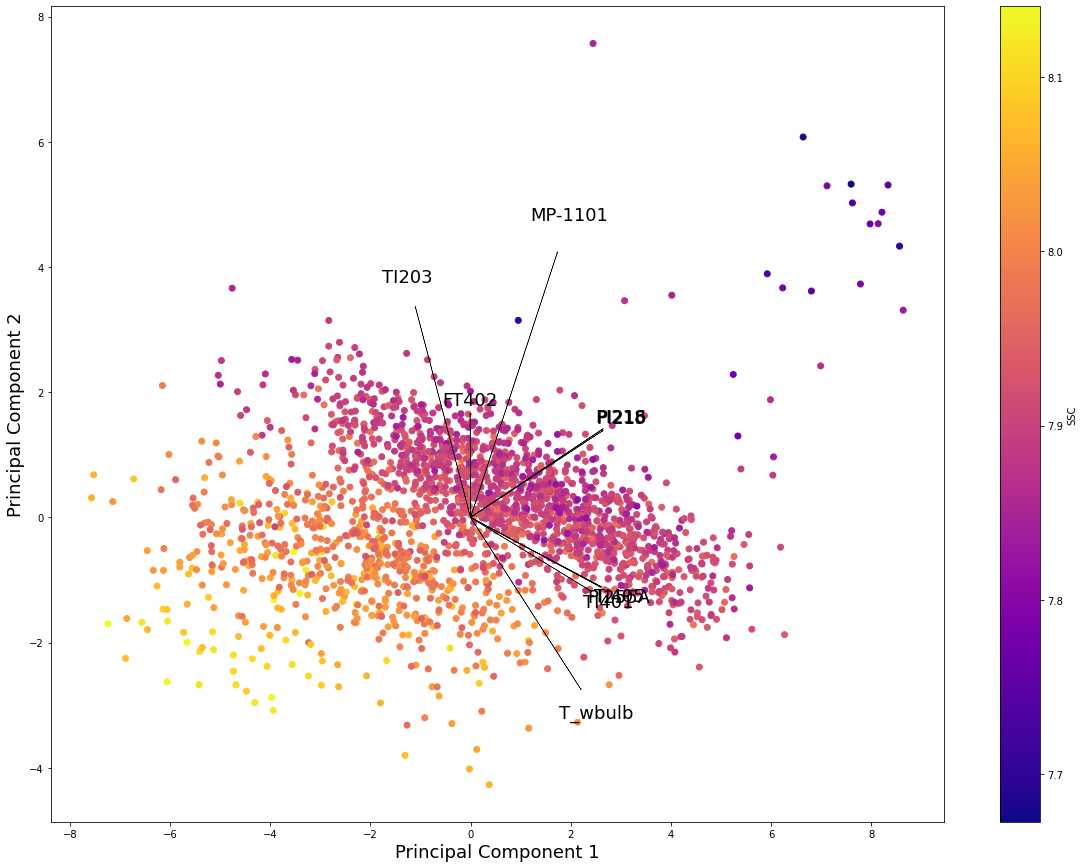

In [ ]:
DataInputs = Data.Inputs
biplot(DataInputs,reduced_data,pca_new)

In [ ]:
plt.figure(figsize=(15,15))
#scalex = 1/(df_pca.PC1.max()-df_pca.PC1.min())
#scaley = 1/(df_pca.PC2.max()-df_pca.PC2.min())
#map = cmaps['Cyclic'] = ['twilight_shifted']

#plt.scatter(scalex*df_pca.PC1,scaley*df_pca.PC2, c = Data.Outputs, cmap='plasma', alpha =1)
plt.scatter(df_pca.PC1, df_pca.PC2, c = Data.Outputs, cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('SSC')
plt.title('PCA Graph')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.xscale("log")
#plt.yscale("logit")
#plt.xlim(-0.3,0.4)
#plt.ylim(-0.2,0.2)